In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
%matplotlib inline

In [2]:
mpl.rcParams.update(mpl.rcParamsDefault)

In [3]:
cargo = pd.read_csv('los_angeles_airport/los-angeles-international-airport-air-cargo-volume.csv')
carrier = pd.read_csv('los_angeles_airport/los-angeles-international-airport-passenger-count-by-carrier-type.csv')

In [4]:
cargo.dtypes

DataExtractDate           object
ReportPeriod              object
Arrival_Departure         object
Domestic_International    object
CargoType                 object
AirCargoTons               int64
dtype: object

In [5]:
def dd(x):
    return x.split('T')[0]

In [6]:
cargo['YearMonth'] = cargo['DataExtractDate'].apply(dd)
cargo['YearMonth'] = pd.to_datetime(cargo['YearMonth'])

In [7]:
cargo.head()

,DataExtractDate,ReportPeriod,Arrival_Departure,Domestic_International,CargoType,AirCargoTons,YearMonth
0,2014-05-01T00:00:00.000,2006-01-01T00:00:00.000,Arrival,Domestic,Freight,35703,2014-05-01
1,2014-05-01T00:00:00.000,2006-01-01T00:00:00.000,Arrival,Domestic,Mail,3209,2014-05-01
2,2014-05-01T00:00:00.000,2006-01-01T00:00:00.000,Arrival,International,Freight,46391,2014-05-01
3,2014-05-01T00:00:00.000,2006-01-01T00:00:00.000,Arrival,International,Mail,548,2014-05-01
4,2014-05-01T00:00:00.000,2006-01-01T00:00:00.000,Departure,Domestic,Freight,36702,2014-05-01


In [8]:
cargo['YearMonth'].describe()

count                    1280
unique                     60
top       2014-05-01 00:00:00
freq                      792
first     2014-05-01 00:00:00
last      2019-05-15 00:00:00
Name: YearMonth, dtype: object

In [9]:
cargo['AirCargoTons'].describe()

count     1280.000000
mean     21249.753906
std      21172.191210
min        454.000000
25%       1679.000000
50%      15392.500000
75%      37013.500000
max      82352.000000
Name: AirCargoTons, dtype: float64

<Figure size 1200x1000 with 0 Axes>

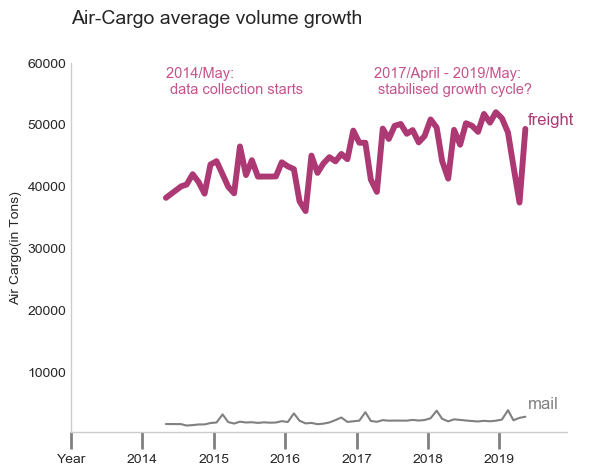

In [10]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12,10))
fig, ax = plt.subplots()


sns.lineplot(x=cargo['YearMonth'], y=cargo['AirCargoTons'], size=cargo['CargoType'],
             sizes=(1.5,4.25),ci=None, hue=cargo['CargoType'],ax=ax,legend=False,palette=['#ac3973','gray'])

ax.tick_params(direction='out',axis='x',which='major',bottom=True,top=False,
               length=12,width=2,color='gray')
ax.set_xticklabels(['Year',2014,2015,2016,2017,2018,2019])
ax.set_ylim(200,60000)
ax.set_xlim('2013-01-01','2019-12-15')
ax.set_ylabel('Air Cargo(in Tons)')
ax.set_xlabel(None)
ax.set_title('Air-Cargo average volume growth',loc='left',fontsize=14,pad=28.2)

ax.grid(None)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.text('2019-05-30',4000,'mail',fontsize=12,color='gray')
ax.text('2019-05-30',49990,'freight',fontsize=12,color='#ac3973')
ax.text('2014-05-01',55000,'2014/May: \n data collection starts',fontsize=10.5,color='#c6538c')
ax.text('2017-04-01', 55000,'2017/April - 2019/May: \n stabilised growth cycle?',fontsize=10.5,color='#c6538c')
plt.show()

In [11]:
carrier['YearMonth'] = carrier['DataExtractDate'].apply(dd)
carrier['YearMonth'] = pd.to_datetime(carrier['YearMonth'])

In [12]:
carrier['FlightType'].value_counts()

Scheduled Carriers    636
Charter               573
Commuter              458
Name: FlightType, dtype: int64

In [13]:
sc = pd.DataFrame(carrier.loc[carrier['FlightType']=='Scheduled Carriers'].describe())
cc = pd.DataFrame(carrier.loc[carrier['FlightType']=='Commuter'].describe())
ch = pd.DataFrame(carrier.loc[carrier['FlightType']=='Charter'].describe())

In [14]:
carrier['Year'] = carrier['YearMonth'].dt.year

In [15]:
carrier.groupby('Year')['Passenger_Count'].sum()

Year
2014    550473758
2015     73590772
2016     79955984
2017     84042973
2018     87269743
2019     34349729
Name: Passenger_Count, dtype: int64

In [16]:
carrier.loc[carrier['FlightType']=='Scheduled Carriers'].head()

,DataExtractDate,ReportPeriod,Arrival_Departure,Domestic_International,FlightType,Passenger_Count,YearMonth,Year
2,2014-05-01T00:00:00.000,2006-01-01T00:00:00.000,Arrival,Domestic,Scheduled Carriers,1538812,2014-05-01,2014
5,2014-05-01T00:00:00.000,2006-01-01T00:00:00.000,Arrival,International,Scheduled Carriers,742810,2014-05-01,2014
8,2014-05-01T00:00:00.000,2006-01-01T00:00:00.000,Departure,Domestic,Scheduled Carriers,1492469,2014-05-01,2014
11,2014-05-01T00:00:00.000,2006-01-01T00:00:00.000,Departure,International,Scheduled Carriers,694117,2014-05-01,2014
14,2014-05-01T00:00:00.000,2006-02-01T00:00:00.000,Arrival,Domestic,Scheduled Carriers,1385488,2014-05-01,2014


In [17]:
carrier.loc[carrier['FlightType']=='Scheduled Carriers'].groupby('Year')['Passenger_Count'].mean()

Year
2014    1.216708e+06
2015    1.532368e+06
2016    1.664387e+06
2017    1.750422e+06
2018    1.817699e+06
2019    1.717060e+06
Name: Passenger_Count, dtype: float64

In [18]:
sc = sc.merge(cc,left_index=True,right_index=True)
sc = sc.merge(ch,left_index=True,right_index=True)

In [19]:
sc

,Passenger_Count_x,Passenger_Count_y,Passenger_Count
count,6.360000e+02,458.000000,573.00000
mean,1.375691e+06,74888.017467,776.56719
std,6.584801e+05,81378.946758,1473.75622
min,5.044420e+05,0.000000,0.00000
25%,7.441540e+05,3361.750000,169.00000
50%,1.270682e+06,5303.500000,460.00000
75%,1.875926e+06,151437.250000,916.00000
max,2.924691e+06,263277.000000,26600.00000


In [20]:
def cagr(start_num,end_num,year):
    return (end_num / start_num)**(1/year)-1

In [21]:
print('{:.2%}'.format(cagr(1216708000000,1717060000000,5)))

7.13%


<Figure size 1200x1000 with 0 Axes>

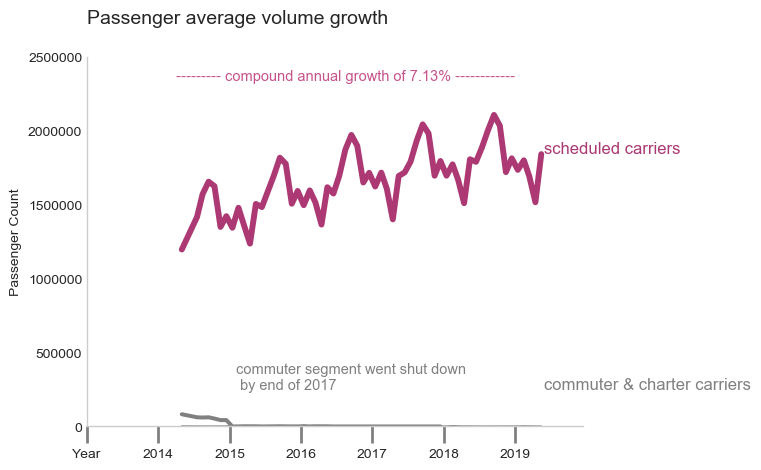

In [23]:
plt.figure(figsize=(12,10))
fig, ax = plt.subplots()
sns.lineplot(x=carrier['YearMonth'],y=carrier['Passenger_Count'],size=carrier['FlightType'],sizes=(4.25,1.5),
             ci=False,hue=carrier['FlightType'],ax=ax,legend=False,palette=['gray','gray','#ac3973'])
ax.tick_params(direction='out',axis='x',which='major',bottom=True,top=False,
               length=12,width=2,color='gray')
ax.set_xticklabels(['Year',2014,2015,2016,2017,2018,2019])
ax.set_ylim(0,2500000)
ax.set_xlim('2013-01-01','2019-12-15')
ax.grid(None)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel('Passenger Count')
ax.set_xlabel(None)
ax.set_title('Passenger average volume growth',loc='left',fontsize=14,pad=24.2)
ax.text('2019-05-30',250000,'commuter & charter carriers',fontsize=12,color='gray')
ax.text('2019-05-30',1850000,'scheduled carriers ',fontsize=12,color='#ac3973')
ax.text('2014-04-01',2340000,'--------- compound annual growth of 7.13% ------------',fontsize=10.5,color='#c6538c')
ax.text('2015-02-01',250000,'commuter segment went shut down \n by end of 2017',fontsize=10.5,color='gray')
plt.show()